`models.explainers` multi label classification example (iris dataset)
-----

### Load packages

In [1]:
from transparentai.models import explainers
from transparentai.datasets import load_iris

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### Load & prepare data

In [2]:
data = load_iris()
X, Y = data.drop(columns='iris plant'), data['iris plant']

In [3]:
Y = Y.replace({'setosa':0, 'versicolor':1, 'virginica':2})

Split train test

In [4]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.33, random_state=42)

### Train classifier

In [5]:
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Use `models.explainers.ModelExplainer` 

In [6]:
explainer = explainers.ModelExplainer(clf, X_train, model_type='tree', multi_label=True)

In [7]:
explainer.explain_global_influence(X_train)

{0: {'sepal length (cm)': 0.009875333038205276,
  'sepal width (cm)': 0.004208666574489324,
  'petal length (cm)': 0.21609266190393822,
  'petal width (cm)': 0.1712453296777792},
 1: {'sepal length (cm)': 0.02212066617566161,
  'sepal width (cm)': 0.013737666577007625,
  'petal length (cm)': 0.21891599496782294,
  'petal width (cm)': 0.21266566187350538},
 2: {'sepal length (cm)': 0.02486499964667018,
  'sepal width (cm)': 0.01570766658058856,
  'petal length (cm)': 0.20791066216307236,
  'petal width (cm)': 0.19730032943675763}}

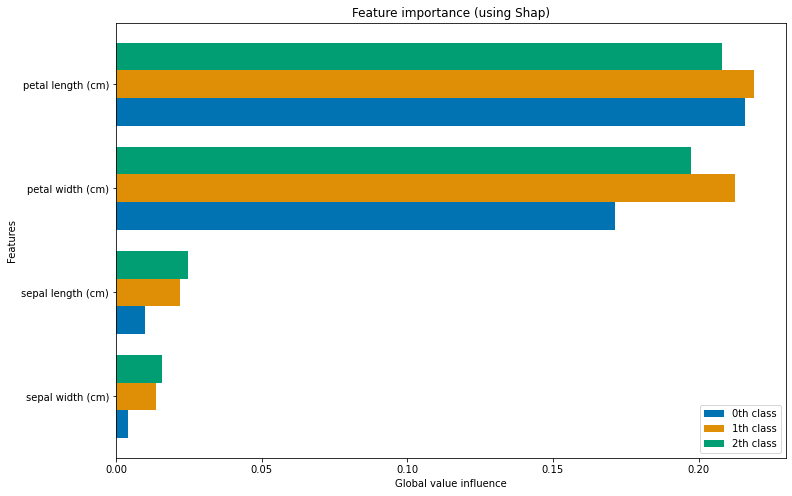

In [8]:
explainer.plot_global_explain()

In [9]:
explainer.explain_local_influence(X_valid.iloc[0])

{0: {'sepal length (cm) = 6.1': -0.004333333256654442,
  'sepal width (cm) = 2.8': -0.0029333333251997827,
  'petal length (cm) = 4.7': -0.12749999715015292,
  'petal width (cm) = 1.2': -0.10503333104774355},
 1: {'sepal length (cm) = 6.1': 0.012716666168998927,
  'sepal width (cm) = 2.8': 0.010583332921378315,
  'petal length (cm) = 4.7': 0.299716659351252,
  'petal width (cm) = 1.2': 0.2715833270433359},
 2: {'sepal length (cm) = 6.1': -0.008383333054371177,
  'sepal width (cm) = 2.8': -0.007649999698624015,
  'petal length (cm) = 4.7': -0.17221666225232185,
  'petal width (cm) = 1.2': -0.1665499960561283}}

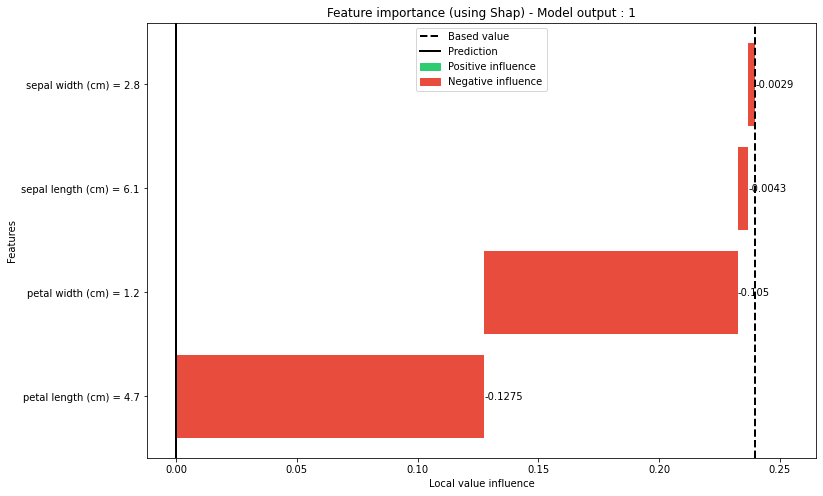

In [10]:
explainer.plot_local_explain(X_valid.iloc[0], num_class=0)

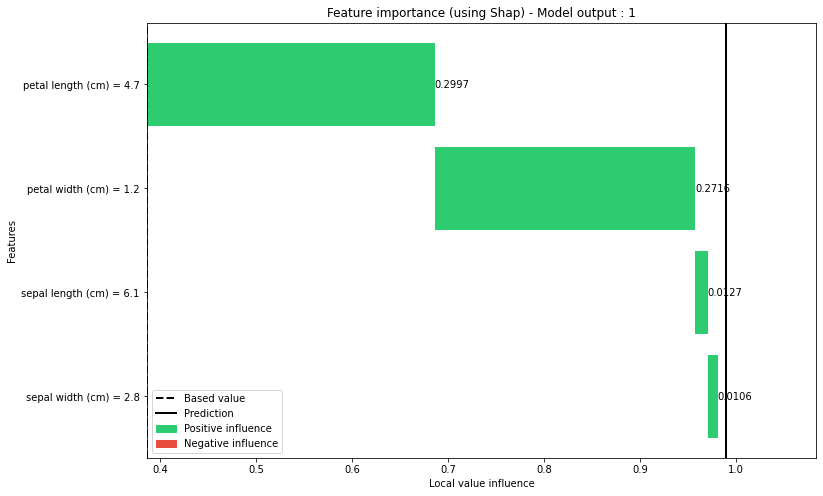

In [11]:
explainer.plot_local_explain(X_valid.iloc[0], num_class=1)

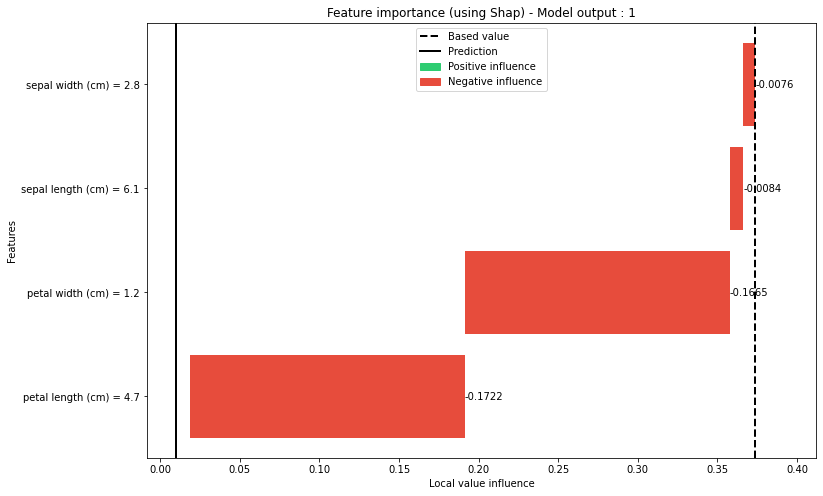

In [12]:
explainer.plot_local_explain(X_valid.iloc[0], num_class=2)

In [13]:
explainer.plot_local_explain_interact(X_valid.iloc[0])

interactive(children=(FloatText(value=6.1, description='sepal length (cm)', style=DescriptionStyle(description…

In [14]:
visible_features = ['petal length (cm)','petal width (cm)']
explainer.plot_local_explain_interact(X_valid.iloc[0], visible_feat=visible_features)

interactive(children=(FloatText(value=4.7, description='petal length (cm)', style=DescriptionStyle(description…